In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Reel Performance/viral reels.csv")
df.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


In [3]:
len(df)

400

In [4]:
df.shape

(400, 10)

In [7]:
df.columns

Index(['video_id', 'duration_sec', 'hook_strength_score', 'niche',
       'views_first_hour', 'views_total', 'retention_rate',
       'first_3_sec_engagement', 'music_type', 'upload_time'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                400 non-null    object 
 1   duration_sec            400 non-null    int64  
 2   hook_strength_score     400 non-null    float64
 3   niche                   400 non-null    object 
 4   views_first_hour        400 non-null    int64  
 5   views_total             400 non-null    int64  
 6   retention_rate          400 non-null    float64
 7   first_3_sec_engagement  400 non-null    float64
 8   music_type              400 non-null    object 
 9   upload_time             400 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 31.4+ KB


In [8]:
df.describe()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,25.085000,0.584850,24730.51000,486338.497500,0.528275,0.617800
std,11.649552,0.229429,14180.99207,291672.505188,0.245214,0.230906
min,5.000000,0.200000,84.00000,1924.000000,0.100000,0.200000
25%,15.000000,0.390000,12497.00000,227904.500000,0.310000,0.420000
50%,26.000000,0.590000,24984.00000,473516.000000,0.530000,0.635000
75%,35.000000,0.770000,36222.25000,745058.750000,0.740000,0.820000
max,44.000000,1.000000,49812.00000,992963.000000,0.950000,0.990000


In [ ]:
#missing values
df.isnull().sum()

video_id                  0
duration_sec              0
hook_strength_score       0
niche                     0
views_first_hour          0
views_total               0
retention_rate            0
first_3_sec_engagement    0
music_type                0
upload_time               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop('video_id',axis=1)

,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15
...,...,...,...,...,...,...,...,...,...
395,21,0.26,Gaming,25585,641343,0.95,0.97,No Music,2024-09-26
396,34,0.74,Food,17315,556771,0.57,0.87,Original,2024-11-06
397,32,0.52,Beauty,38460,929848,0.29,0.56,Original,2024-06-12
398,43,0.44,Motivation,28205,528558,0.79,0.26,Viral Track,2024-05-04


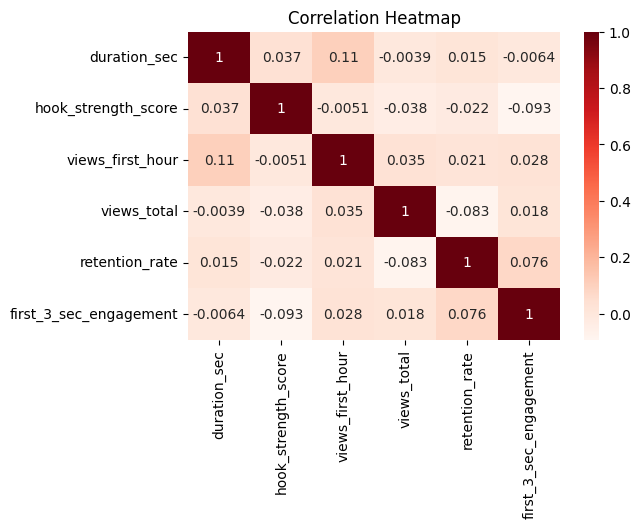

In [ ]:
#correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

In [52]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [54]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


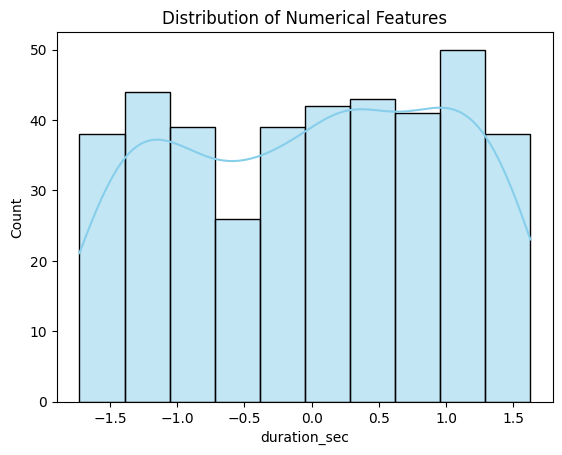

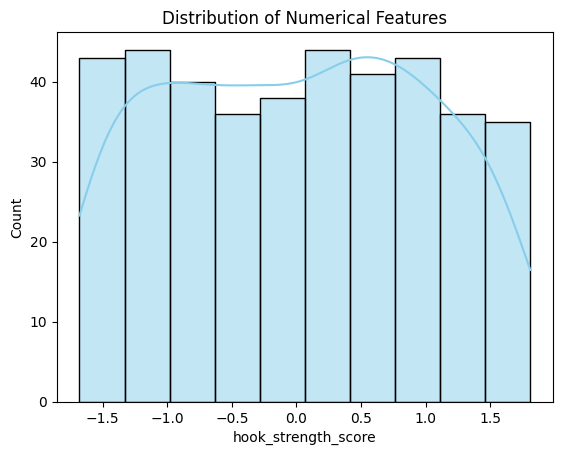

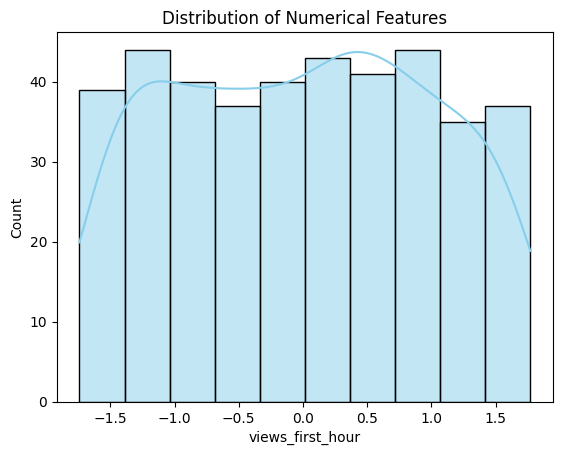

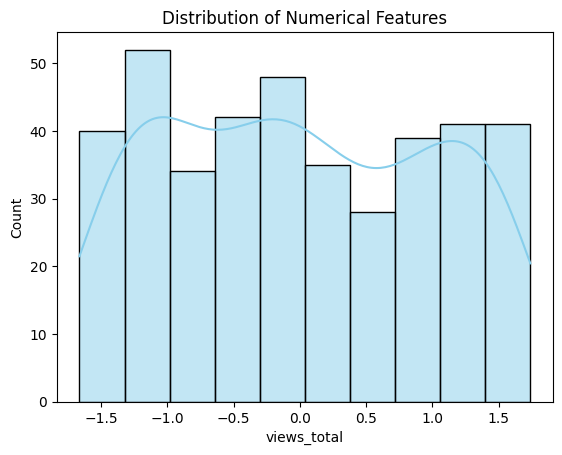

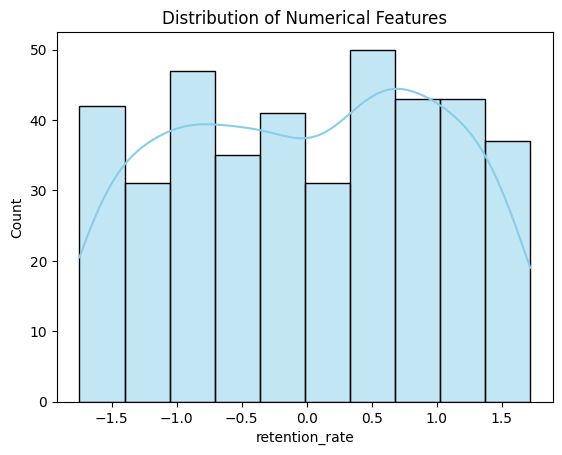

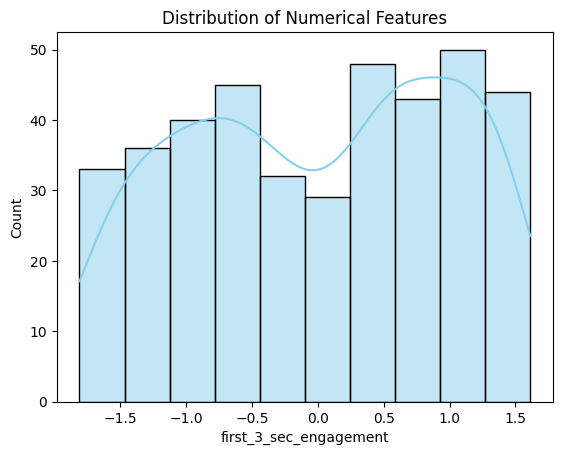

In [83]:
#Distribution of Numerical Features

numeric_cols=['duration_sec', 'hook_strength_score',
       'views_first_hour', 'views_total', 'retention_rate',
       'first_3_sec_engagement']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col],kde=True,color='skyblue')
    plt.title(f"Distribution of Numerical Features")
    plt.show()

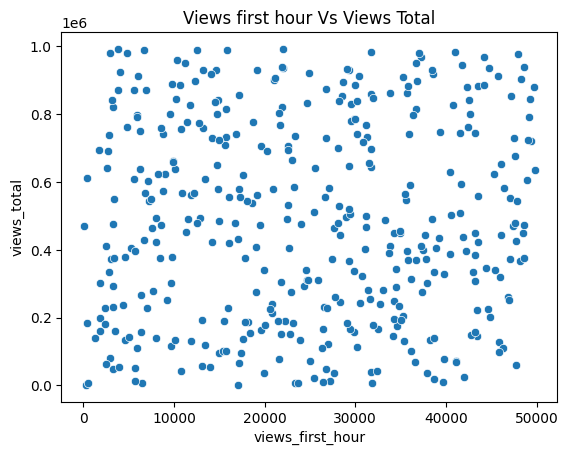

In [19]:
#how first hours can get more views? view first hours Vs total views

plt.figure()
sns.scatterplot(data=df, x='views_first_hour',y='views_total')
plt.title('Views first hour Vs Views Total')
plt.show()

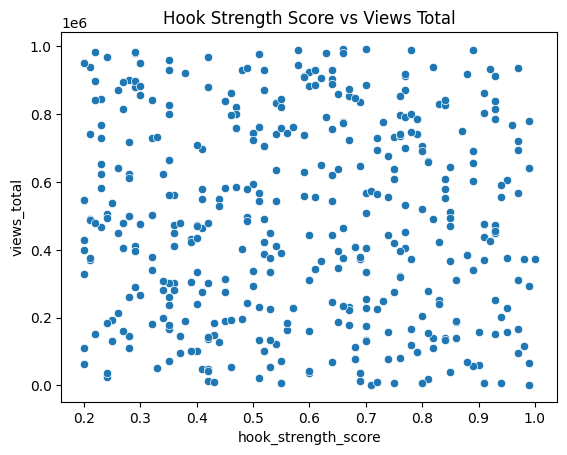

In [20]:
# Hook Strength vs Views Total

plt.figure()
sns.scatterplot(data=df, x='hook_strength_score', y='views_total')
plt.title("Hook Strength Score vs Views Total")
plt.show()

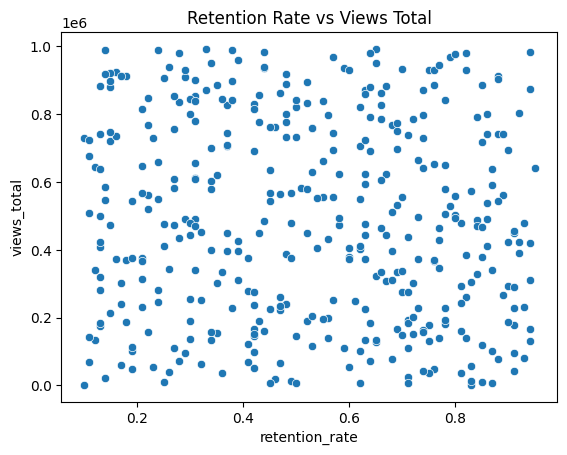

In [21]:
# Retention vs Views Total

plt.figure()
sns.scatterplot(data=df, x='retention_rate', y='views_total')
plt.title("Retention Rate vs Views Total")
plt.show()

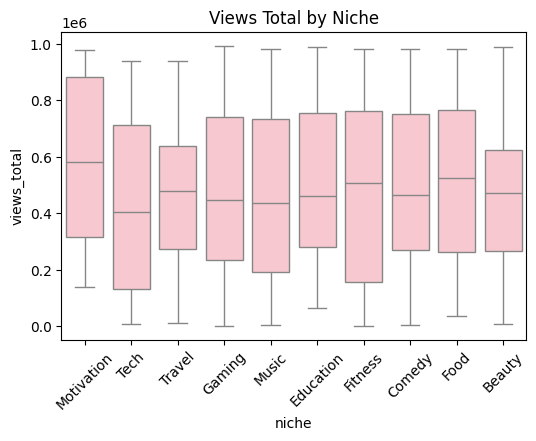

In [30]:
# Niche vs Views

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='niche', y='views_total', color="pink")
plt.xticks(rotation=45)
plt.title("Views Total by Niche")
plt.show()

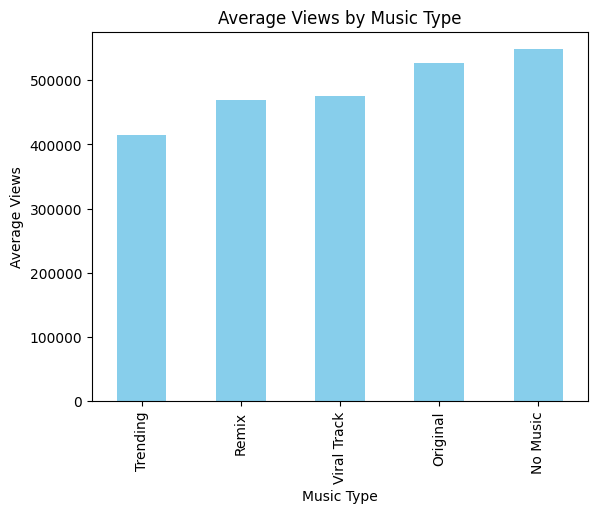

In [28]:
#Average Views by Music Type

plt.figure()
df.groupby('music_type')['views_total'].mean().sort_values().plot(kind='bar', color="skyblue")
plt.title("Average Views by Music Type")
plt.xlabel("Music Type")
plt.ylabel("Average Views")
plt.show()


In [40]:
#Finding Label= Viral

median_views=df['views_total'].median()
df['viral']=(df['views_total']>median_views).astype(int)

print(df[['views_total','viral']].head())

   views_total  viral
0       886048      1
1       198243      0
2       584171      1
3       491291      1
4       607425      1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [85]:
#Logistic Rgression

X = df.drop(columns=["viral"])
y = df["viral"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [86]:
#Model Training
log = LogisticRegression()
log.fit(X_train, y_train)

viral_train_results = log.predict(X_train)
viral_test_results = log.predict(X_test)


In [87]:
from sklearn.metrics import accuracy_score
print("Training results:", accuracy_score(viral_train_results, y_train) * 100, '%')
print("Testing results:", accuracy_score(viral_test_results, y_test) * 100, '%')

Training results: 100.0 %
Testing results: 100.0 %


In [88]:
x_train.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time,upload_hour,is_viral
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01,0,1
18,vid_19,11,0.30,Food,11247,950499,0.65,0.77,No Music,2024-02-14,0,1
202,vid_203,40,0.88,Tech,38627,917933,0.48,0.77,Viral Track,2024-03-05,0,1
250,vid_251,32,0.33,Gaming,15706,734134,0.48,0.52,Trending,2024-02-01,0,1
274,vid_275,34,0.51,Fitness,42408,761862,0.45,0.83,No Music,2024-04-18,0,1


In [65]:
x_test.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time,upload_hour,is_viral
209,vid_210,7,0.32,Motivation,2418,181241,0.78,0.75,Original,2024-06-22,0,0
280,vid_281,10,0.66,Travel,11398,777706,0.48,0.47,No Music,2024-01-13,0,1
33,vid_34,21,0.41,Food,3401,548903,0.24,0.69,No Music,2024-11-22,0,1
210,vid_211,36,0.21,Travel,35800,368668,0.18,0.63,Trending,2024-12-21,0,0
93,vid_94,34,0.48,Motivation,29315,931077,0.75,0.90,Original,2024-05-27,0,1


In [66]:
log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
linear = LinearRegression()
linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
train_pred = linear.predict(X_train)
test_pred = linear.predict(X_test)


In [75]:
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(train_mae)
print(test_mae)
print(train_rmse)
print(test_rmse)

8.212180935274204e-16
7.757683384568281e-16
1.0047173339059726e-15
9.890492087622156e-16


In [78]:
#Saving Pickle file

import pickle

with open("viral_model.pkl", "wb") as f:
    pickle.dump((log, scaler, numeric_cols, X.columns.tolist()), f)

print("Model saved as viral_model.pkl")

Model saved as viral_model.pkl


In [77]:
with open("likes_model.pkl", "wb") as f:
    pickle.dump((linear, scaler, numeric_cols, X.columns.tolist()), f)

print("Model saved as likes_model.pkl")


Model saved as likes_model.pkl
